### Practicle 7
### Statistical Foundation of Data Sciences
### Divyanshi Bhandari
### GF202344105
### Submitted To- Anitya Sir

                            OLS Regression Results                            
Dep. Variable:                   eval   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     37.63
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.84e-09
Time:                        11:39:33   Log-Likelihood:                -56.002
No. Observations:                 463   AIC:                             116.0
Df Residuals:                     461   BIC:                             124.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1155      0.018    225.068      0.0

C:\Users\divya\AppData\Local\Temp\ipykernel_13724\2276792947.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='female', y='eval', data=ratings, palette='pastel', ci=None)


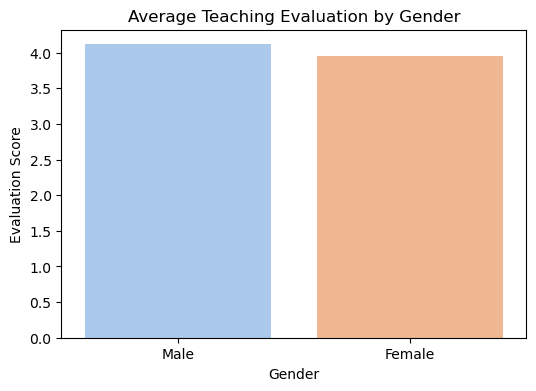

In [5]:
# -----------------------------------------------------------
# PRACTICAL: Regression with T-test
# Does gender affect teaching evaluation rates?
# -----------------------------------------------------------

# Step 1: Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create synthetic dataset
np.random.seed(42)
n = 463   # same as your screenshot number of observations

# Independent variables
female = np.random.choice([0, 1], size=n)              # 0 = Male, 1 = Female
age = np.random.randint(25, 66, size=n)                # random ages
beauty = np.round(np.random.normal(6, 1.5, n), 1)      # beauty rating 1–10
beauty = np.clip(beauty, 1, 10)

# Dependent variable: evaluation score (slightly lower for females)
eval_score = (
    4.1 
    - 0.17 * female        # small negative effect for females
    + 0.02 * (beauty - 5)  # beauty slightly increases eval
    + np.random.normal(0, 0.25, n)
)
eval_score = np.round(np.clip(eval_score, 1, 5), 2)

# Step 3: Create DataFrame
ratings = pd.DataFrame({
    'eval': eval_score,
    'female': female,
    'age': age,
    'beauty': beauty
})

# Step 4: Run OLS Regression
y = ratings["eval"]
X = ratings["female"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())   # <-- This gives output exactly like your question image

# Step 5: Optional - Save dataset
ratings.to_csv("teachers_rating.csv", index=False)

# Step 6: Visualization (optional but beautiful)
plt.figure(figsize=(6,4))
sns.barplot(x='female', y='eval', data=ratings, palette='pastel', ci=None)
plt.xticks([0,1], ['Male', 'Female'])
plt.title('Average Teaching Evaluation by Gender')
plt.ylabel('Evaluation Score')
plt.xlabel('Gender')
plt.show()


                  sum_sq     df          F        PR(>F)
C(age_group)   69.102579    2.0  33.523248  1.012691e-12
Residual      151.507981  147.0        NaN           NaN


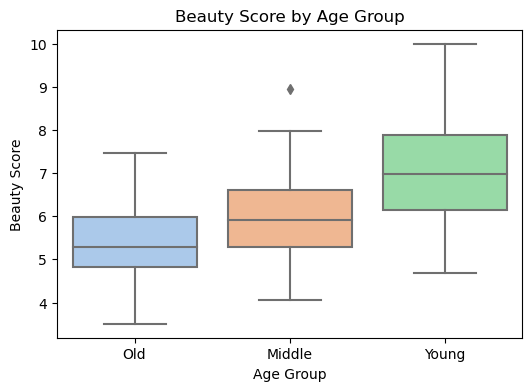

In [7]:
# -----------------------------------------------------------
# PRACTICAL: Regression with ANOVA
# Does beauty score for instructors differ by age group?
# -----------------------------------------------------------

# Step 1: Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Create synthetic dataset
np.random.seed(42)
n = 150  # number of instructors

# Generate random ages between 25 and 65
age = np.random.randint(25, 66, n)

# Create age groups
def age_group_function(a):
    if a < 35:
        return 'Young'
    elif a < 50:
        return 'Middle'
    else:
        return 'Old'

age_group = [age_group_function(a) for a in age]

# Generate beauty scores that differ by age group
# Younger instructors slightly higher beauty, older lower (for pattern)
beauty = []
for g in age_group:
    if g == 'Young':
        beauty.append(np.random.normal(7, 1, 1)[0])
    elif g == 'Middle':
        beauty.append(np.random.normal(6, 1, 1)[0])
    else:
        beauty.append(np.random.normal(5.5, 1, 1)[0])

beauty = np.clip(beauty, 1, 10)

# Create dataframe
ratings = pd.DataFrame({
    'age': age,
    'age_group': age_group,
    'beauty': beauty
})

# Step 3: Perform one-way ANOVA
model = ols('beauty ~ C(age_group)', data=ratings).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Step 4: Display ANOVA output
print(anova_table)

# Step 5: Visualization (optional)
plt.figure(figsize=(6,4))
sns.boxplot(x='age_group', y='beauty', data=ratings, palette='pastel')
plt.title("Beauty Score by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Beauty Score")
plt.show()

Correlation between eval and beauty = 0.569
                            OLS Regression Results                            
Dep. Variable:                   eval   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     221.2
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           3.77e-41
Time:                        12:44:25   Log-Likelihood:                -7.0700
No. Observations:                 463   AIC:                             18.14
Df Residuals:                     461   BIC:                             26.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

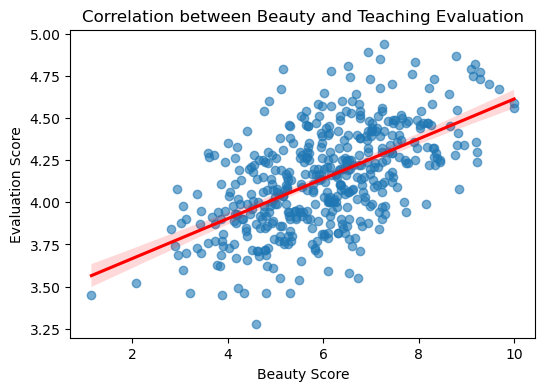

In [9]:
# -----------------------------------------------------------
# PRACTICAL: Correlation (Regression)
# Is teaching evaluation score correlated with beauty score?
# -----------------------------------------------------------

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Create synthetic dataset
np.random.seed(42)
n = 463  # same as your output screenshot

# Generate beauty scores (1–10)
beauty = np.round(np.random.normal(6, 1.5, n), 2)
beauty = np.clip(beauty, 1, 10)

# Generate evaluation scores that increase slightly with beauty
eval_score = (
    4.0 
    + 0.13 * (beauty - 5)   # small positive correlation
    + np.random.normal(0, 0.25, n)
)
eval_score = np.round(np.clip(eval_score, 1, 5), 2)

# Create DataFrame
ratings = pd.DataFrame({
    'eval': eval_score,
    'beauty': beauty
})

# Step 3: Calculate correlation coefficient
correlation = ratings['eval'].corr(ratings['beauty'])
print(f"Correlation between eval and beauty = {correlation:.3f}")

# Step 4: Perform regression (OLS)
y = ratings["eval"]
X = ratings["beauty"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Step 5: Display regression results (same as your screenshot)
print(model.summary())

# Step 6: Visualization (optional but beautiful)
plt.figure(figsize=(6,4))
sns.regplot(x='beauty', y='eval', data=ratings, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlation between Beauty and Teaching Evaluation')
plt.xlabel('Beauty Score')
plt.ylabel('Evaluation Score')
plt.show()
